# Chronic Kidney Disease dataset

Na podstawie 25 cech będziemy przewidywać, czy pacjent ma chroniczną chorobę nerek

https://www.kaggle.com/mansoordaku/ckdisease

In [735]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import os

import sys  
!{sys.executable} -m pip install tensorflow

In [736]:
data = pd.read_csv("data/kidney_disease.csv", index_col=0)
data.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


## Informacje o danych

- age - age
- bp - blood pressure
- sg - specific gravity
- al - albumin
- su - sugar
- rbc - red blood cells
- pc - pus cell
- pcc - pus cell clumps
- ba - bacteria
- bgr - blood glucose random
- bu - blood urea
- sc - serum creatinine
- sod - sodium
- pot - potassium
- hemo - hemoglobin
- pcv - packed cell volume
- wc - white blood cell count
- rc - red blood cell count
- htn - hypertension
- dm - diabetes mellitus
- cad - coronary artery disease
- appet - appetite
- pe - pedal edema
- ane - anemia

## Preprocessing danych

In [737]:
# sprawdzmy typy danych
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [738]:
# na poczatek rozdzielmy dane na kategoryczne i numeryczne

categorical_columns=[]
numerical_columns=[]
for col in data.columns.values:
    if data[col].dtype=='object':
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)

categorical=data[categorical_columns]
numerical=data[numerical_columns]

In [739]:
#sprwadzmy jakie wartosci wystepuja w kolumnach kategorycznych

for col in categorical_columns:
    print(data[col].value_counts(), "\n")

normal      201
abnormal     47
Name: rbc, dtype: int64 

normal      259
abnormal     76
Name: pc, dtype: int64 

notpresent    354
present        42
Name: pcc, dtype: int64 

notpresent    374
present        22
Name: ba, dtype: int64 

41      21
52      21
48      19
44      19
40      16
43      14
42      13
45      13
33      12
28      12
36      12
50      12
32      12
37      11
34      11
30       9
29       9
35       9
46       9
31       8
39       7
24       7
26       6
38       5
47       4
51       4
53       4
49       4
54       4
25       3
22       3
27       3
23       2
19       2
9        1
20       1
17       1
21       1
\t?      1
18       1
\t43     1
15       1
14       1
16       1
Name: pcv, dtype: int64 

9800     11
6700     10
9600      9
7200      9
9200      9
         ..
12700     1
2200      1
10800     1
\t?       1
18900     1
Name: wc, Length: 92, dtype: int64 

5.2    18
4.5    16
4.9    14
4.7    11
4.8    10
3.9    10
3.4     9
4.6     9
3.7

In [740]:
# jak widac, niektore kolumny maja zle sparsowane wartosci, np rc zawiera"\t?", pvc zawiera
# rc zawiera dane liczbowe, dlatego po poprawieniu zle sparsowanej wartosci powinnismy przeniesc kolumne
# do danych numerycznych



In [741]:
# zamieniamy "\t?" na nany
categorical = categorical.replace("\t?", np.NaN)

In [742]:
# usuwamy "\t" jezeli pojawia sie w jakiejs komorce

for col in categorical_columns:
    categorical[col] = categorical[col].str.replace("\\t", "")

<ipython-input-742-2de3eed72196>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  categorical[col] = categorical[col].str.replace("\\t", "")


In [743]:
# kolumny, ktore rzeczywiscie maja wartosci kategoryczne musimy odpowiednio zmapowac

for col in categorical_columns:
    print(categorical[col].value_counts(), "\n")

normal      201
abnormal     47
Name: rbc, dtype: int64 

normal      259
abnormal     76
Name: pc, dtype: int64 

notpresent    354
present        42
Name: pcc, dtype: int64 

notpresent    374
present        22
Name: ba, dtype: int64 

41    21
52    21
48    19
44    19
40    16
43    15
42    13
45    13
36    12
28    12
33    12
50    12
32    12
37    11
34    11
29     9
30     9
35     9
46     9
31     8
39     7
24     7
26     6
38     5
47     4
51     4
53     4
49     4
54     4
22     3
25     3
27     3
23     2
19     2
21     1
18     1
14     1
15     1
9      1
17     1
20     1
16     1
Name: pcv, dtype: int64 

9800     11
6700     10
7200      9
9200      9
9600      9
         ..
12700     1
2200      1
10800     1
15700     1
18900     1
Name: wc, Length: 89, dtype: int64 

5.2    18
4.5    16
4.9    14
4.7    11
4.8    10
3.9    10
3.4     9
4.6     9
5.5     8
6.1     8
5.9     8
5.0     8
3.7     8
5.3     7
3.8     7
5.4     7
5.8     7
5.6     6
4.3     6

In [744]:
print(categorical_columns)

['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'classification']


In [745]:
# odpowiednio mapujemy wartosci

categorical["rbc"] = categorical.rbc.replace({"normal":0, "abnormal":1})
categorical["pc"] = categorical.pc.replace({"normal":0, "abnormal":1})
categorical["pcc"] = categorical.pcc.replace({"notpresent":0, "present":1})
categorical["ba"] = categorical.ba.replace({"notpresent":0, "present":1})
categorical["htn"] = categorical.htn.replace({"no":0, "yes":1})
categorical["dm"] = categorical.dm.replace({"no":0, "yes":1, " yes":1})
categorical["cad"] = categorical.cad.replace({"no":0, "yes":1, " yes":1})
categorical["appet"] = categorical.appet.replace({"good":0, "poor":1})
categorical["pe"] = categorical.pe.replace({"no":0, "yes":1})
categorical["ane"] = categorical.ane.replace({"no":0, "yes":1})
categorical["classification"] = categorical.classification.replace({"notckd":0, "ckd":1})

In [746]:
# konwertujemy na typ liczbowy

categorical = categorical.apply(pd.to_numeric)

In [747]:
categorical.head()

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,
0,NaN,0.0,0.0,0.0,44.0,7800.0,5.2,1.0,1.0,0.0,0.0,0.0,0.0,1
1,NaN,0.0,0.0,0.0,38.0,6000.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,31.0,7500.0,NaN,0.0,1.0,0.0,1.0,0.0,1.0,1
3,0.0,1.0,1.0,0.0,32.0,6700.0,3.9,1.0,0.0,0.0,1.0,1.0,1.0,1
4,0.0,0.0,0.0,0.0,35.0,7300.0,4.6,0.0,0.0,0.0,0.0,0.0,0.0,1


In [748]:
numerical.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
id,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6


In [749]:
# polaczmy ze soba dane po transformacji

data = pd.concat([numerical, categorical], axis=1)

data.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
id,,,,,,,,,,,,,,,,,,,,,
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,...,44.0,7800.0,5.2,1.0,1.0,0.0,0.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,...,38.0,6000.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,...,31.0,7500.0,NaN,0.0,1.0,0.0,1.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,...,32.0,6700.0,3.9,1.0,0.0,0.0,1.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,...,35.0,7300.0,4.6,0.0,0.0,0.0,0.0,0.0,0.0,1


### Uzupelnianie brakujacych wartosci

In [750]:
# sprawdzmy ile brakuje wartosci w kazdej kolumnie

data.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
rbc               152
pc                 65
pcc                 4
ba                  4
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [751]:
# pominiemy wiersze z najwieksza iloscia brakujacych danych
data = data[data["wc"].notna()]
data = data[data["sod"].notna()]
data = data[data["rbc"].notna()]

In [752]:
#brakujace wartosci wygladaja juz duzo lepiej

data.isnull().sum()

age                2
bp                 3
sg                 2
al                 3
su                 3
bgr               10
bu                 6
sc                 3
sod                0
pot                0
hemo               3
rbc                0
pc                 6
pcc                3
ba                 3
pcv                2
wc                 0
rc                 6
htn                2
dm                 2
cad                2
appet              1
pe                 1
ane                1
classification     0
dtype: int64

In [753]:
# pozostale nulle mozemy juz wypelnic na podstawie pozostalych komorek
import random

# dla danych ciaglych wybierzemy srednia wartosc
for col in ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']:
    data[col].fillna((data[col].mean()), inplace=True)

# dla dyskretnych danych true/false wybierzemy mode z kolumny
for col in ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']:
    data[col].fillna(data[col].mode()[0], inplace=True)

In [754]:
# upewnijmy sie czy nic nie brakuje
data.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
rbc               0
pc                0
pcc               0
ba                0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [755]:
# nasze dane sa gotowe do analizy

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189 entries, 3 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             189 non-null    float64
 1   bp              189 non-null    float64
 2   sg              189 non-null    float64
 3   al              189 non-null    float64
 4   su              189 non-null    float64
 5   bgr             189 non-null    float64
 6   bu              189 non-null    float64
 7   sc              189 non-null    float64
 8   sod             189 non-null    float64
 9   pot             189 non-null    float64
 10  hemo            189 non-null    float64
 11  rbc             189 non-null    float64
 12  pc              189 non-null    float64
 13  pcc             189 non-null    float64
 14  ba              189 non-null    float64
 15  pcv             189 non-null    float64
 16  wc              189 non-null    float64
 17  rc              189 non-null    flo

### Analiza danych

In [756]:
corr = data.loc[:, data.columns != "classification"].corr()
corr

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane
age,1.000000,0.042272,-0.274692,0.245739,0.246695,0.290275,0.158537,0.118716,-0.115474,0.013199,...,0.059472,-0.191672,0.156061,-0.218018,0.363470,0.297132,0.277309,0.151592,0.196147,0.085331
bp,0.042272,1.000000,-0.210624,0.339627,0.242529,0.170952,0.326800,0.395332,-0.244620,0.112782,...,0.211974,-0.372387,0.016142,-0.268190,0.335228,0.228216,0.229559,0.173247,0.178926,0.331452
sg,-0.274692,-0.210624,1.000000,-0.695266,-0.417369,-0.493276,-0.469238,-0.503670,0.492742,-0.051895,...,-0.447140,0.640552,-0.279466,0.583134,-0.642923,-0.631716,-0.356175,-0.461436,-0.504340,-0.339715
al,0.245739,0.339627,-0.695266,1.000000,0.467278,0.471545,0.632154,0.607477,-0.591799,0.184471,...,0.537419,-0.725155,0.273850,-0.629181,0.780303,0.648914,0.407074,0.604695,0.592026,0.522283
su,0.246695,0.242529,-0.417369,0.467278,1.000000,0.662864,0.251516,0.274527,-0.212062,0.230676,...,0.284251,-0.336153,0.241512,-0.359627,0.543485,0.547966,0.472404,0.191898,0.322073,0.098507
bgr,0.290275,0.170952,-0.493276,0.471545,0.662864,1.000000,0.266298,0.253898,-0.269926,0.104784,...,0.277461,-0.400560,0.218094,-0.382485,0.559981,0.605361,0.384697,0.276274,0.291367,0.125920
bu,0.158537,0.326800,-0.469238,0.632154,0.251516,0.266298,1.000000,0.846067,-0.521833,0.202693,...,0.231267,-0.721692,0.054555,-0.631177,0.590017,0.551843,0.348218,0.513848,0.623560,0.667056
sc,0.118716,0.395332,-0.503670,0.607477,0.274527,0.253898,0.846067,1.000000,-0.530968,0.115757,...,0.190820,-0.733472,0.076917,-0.655609,0.595044,0.569218,0.302269,0.460920,0.605017,0.624350
sod,-0.115474,-0.244620,0.492742,-0.591799,-0.212062,-0.269926,-0.521833,-0.530968,1.000000,-0.053896,...,-0.236170,0.577422,-0.105569,0.492592,-0.546790,-0.484169,-0.228037,-0.509582,-0.474539,-0.538373
pot,0.013199,0.112782,-0.051895,0.184471,0.230676,0.104784,0.202693,0.115757,-0.053896,1.000000,...,-0.000470,-0.186353,-0.109906,-0.174267,0.157487,0.163408,0.005877,-0.003077,0.016227,0.224349


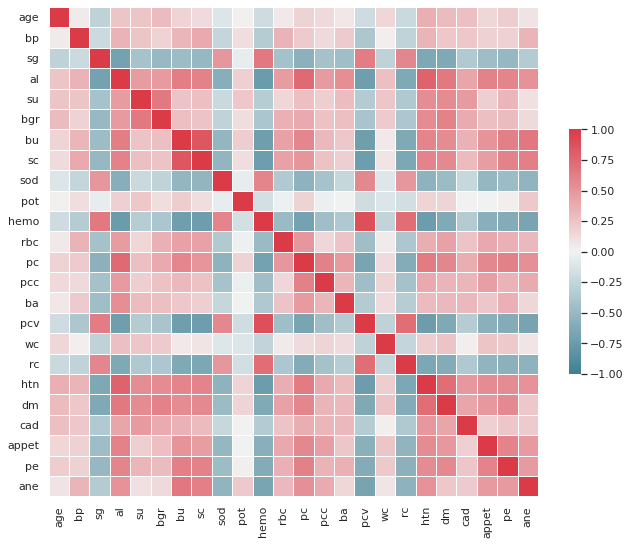

In [757]:
sns.set(style="darkgrid")

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmin=-1, vmax=1,
            square=True, 
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.show()

## Stwórzmy model

In [758]:
# podzielmy dane na zbior testowy i cwiczeniowy

y = data['classification']
X = data.loc[:, data.columns != 'classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [759]:
# potrzebne importy
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [760]:
# wyszukamy najlepsze parametry

from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)

In [761]:
# SVM rbf

pipeline1 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(probability=True))])

param_grid_1 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__gamma': [0.001, 0.01, 0.1, 1, 10, 100],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_1 = GridSearchCV(pipeline1, param_grid_1, cv=kfold, return_train_score=True)

grid_1.fit(X_train, y_train)
grid_1.best_params_

{'classifier__C': 0.1,
 'classifier__gamma': 0.1,
 'preprocessing': StandardScaler()}

In [762]:
# SVM poly

pipeline_2 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="poly", probability=True))]) 

param_grid_2 = {'preprocessing': [StandardScaler(), None],
              'classifier__C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              'classifier__coef0': [0.001, 0.01, 0.1, 1, 10, 100],
             'classifier__degree': [1, 2, 3, 4, 5, 6]}
grid_2 = GridSearchCV(pipeline_2, param_grid_2, cv=kfold, return_train_score=True)

grid_2.fit(X_train, y_train)
grid_2.best_params_

{'classifier__C': 1e-05,
 'classifier__coef0': 100,
 'classifier__degree': 4,
 'preprocessing': StandardScaler()}

In [763]:
# SVM linear

pipeline_3 = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel="linear", probability=True))])

param_grid_3 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}
grid_3 = GridSearchCV(pipeline_3, param_grid_3, cv=kfold, return_train_score=True)

grid_3.fit(X_train, y_train)
grid_3.best_params_

{'classifier__C': 0.1, 'preprocessing': StandardScaler()}

In [764]:
# logistic regression

pipeline_4 = Pipeline([('preprocessing', StandardScaler()), ('classifier', LogisticRegression(n_jobs=-1))])

param_grid_4 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_4 = GridSearchCV(pipeline_4, param_grid_4, cv=kfold, return_train_score=True) 
grid_4.fit(X_train, y_train)
grid_4.best_params_

{'classifier__C': 0.1, 'preprocessing': StandardScaler()}

In [765]:
# decision tree classifier

pipeline_5 = Pipeline([('preprocessing', StandardScaler()), ('classifier', DecisionTreeClassifier())])

param_grid_5 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_depth': [1, 5, 10, 20],
            'classifier__max_leaf_nodes': [None, 5, 10, 20, 50, 100],
}

grid_5 = GridSearchCV(pipeline_5, param_grid_5, cv=kfold, return_train_score=True)

grid_5.fit(X_train, y_train)
grid_5.best_params_

{'classifier__max_depth': 1,
 'classifier__max_leaf_nodes': None,
 'preprocessing': StandardScaler()}

In [766]:
# random forest classifier

pipeline_6 = Pipeline([('preprocessing', StandardScaler()), ('classifier', RandomForestClassifier(n_jobs=-1))])

param_grid_6 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [1, 3, 5, 10, 50],
            'classifier__max_leaf_nodes' : [2, 4, 6, 16, 32, 64],
}

grid_6 = GridSearchCV(pipeline_6, param_grid_6, cv=kfold, return_train_score=True)

grid_6.fit(X_train, y_train)
grid_6.best_params_

{'classifier__max_leaf_nodes': 4,
 'classifier__n_estimators': 50,
 'preprocessing': StandardScaler()}

In [767]:
# ada boost classifier

pipeline_7 = Pipeline([('preprocessing', StandardScaler()), ('classifier', AdaBoostClassifier())])

param_grid_7 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [5, 10, 50, 100, 500, 600, 700],
            'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.5, 0.7, 1],
}

grid_7 = GridSearchCV(pipeline_7, param_grid_7, cv=kfold, return_train_score=True)

grid_7.fit(X_train, y_train)
grid_7.best_params_

{'classifier__learning_rate': 0.001,
 'classifier__n_estimators': 5,
 'preprocessing': StandardScaler()}

In [768]:
# gradient boosting classifier

pipeline_8 = Pipeline([('preprocessing', StandardScaler()), ('classifier', GradientBoostingClassifier())])

param_grid_8 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [5, 10, 50, 100, 500],
            'classifier__learning_rate' : [0.001, 0.01, 0.1, 0.5, 0.7, 1],
}

grid_8 = GridSearchCV(pipeline_8, param_grid_8, cv=kfold, return_train_score=True)

grid_8.fit(X_train, y_train)
grid_8.best_params_

{'classifier__learning_rate': 0.7,
 'classifier__n_estimators': 10,
 'preprocessing': StandardScaler()}

In [769]:
from sklearn.neural_network import MLPRegressor, MLPClassifier

In [770]:
# MLP Classifier

pipeline_9 = Pipeline([('preprocessing', StandardScaler()), ('classifier', MLPClassifier())])

param_grid_9 = {
            'preprocessing': [StandardScaler(), None],
            'classifier__hidden_layer_sizes': [(20,10)],
            'classifier__learning_rate_init': [0.001, 0.01, 0.1],
            'classifier__max_iter': [100, 500, 1000],
            'classifier__batch_size': [8, 16,32],
}

grid_9 = GridSearchCV(pipeline_9, param_grid_9, cv=kfold, return_train_score=True)

grid_9.fit(X_train, y_train)
grid_9.best_params_

/home/kacper/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kacper/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kacper/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kacper/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/kacper/.local/lib/python3.8/site-packages/skle

{'classifier__batch_size': 8,
 'classifier__hidden_layer_sizes': (20, 10),
 'classifier__learning_rate_init': 0.1,
 'classifier__max_iter': 100,
 'preprocessing': StandardScaler()}

In [771]:
# # MLP Regressor

# pipeline_10 = Pipeline([('preprocessing', StandardScaler()), ('classifier', MLPRegressor())])

# param_grid_10 = {
#             'preprocessing': [StandardScaler(), None],
#             'classifier__hidden_layer_sizes': [(20,10)],
#             'classifier__learning_rate_init': [0.0001, 0.001, 0.01, 0.1, 1],
#             'classifier__max_iter': [5000, 50000, 500000],
#             'classifier__batch_size':[10, 20, 30, 40],
# }

# grid_10 = GridSearchCV(pipeline_10, param_grid_10, cv=kfold, return_train_score=True)

# grid_10.fit(X_train, y_train)
# grid_10.best_params_

{'classifier__batch_size': 10,
 'classifier__hidden_layer_sizes': (20, 10),
 'classifier__learning_rate_init': 0.1,
 'classifier__max_iter': 500000,
 'preprocessing': StandardScaler()}

### Porównajmy otrzymane wyniki

In [772]:
from sklearn import  metrics

models = []
models.append(('SVM rbf', grid_1.best_estimator_))
models.append(('SVM poly', grid_2.best_estimator_))
models.append(('SVM linear', grid_3.best_estimator_))
models.append(('Logistic Regression', grid_4.best_estimator_))
models.append(('Decision Trees Classifier', grid_5.best_estimator_))
models.append(('Random Forest Classifier', grid_6.best_estimator_))
models.append(('Ada Boost Classifier', grid_7.best_estimator_))
models.append(('Gradient Boosting Classifier', grid_8.best_estimator_))
models.append(('MLP Classifier', grid_9.best_estimator_))
# models.append(('MPL Regressor', grid_10.best_estimator_))

precision_score = []
recall_score = []
f1_score = []
accuracy_score = []
for name, model in models:
    y_predict = model.predict(X_test)
    precision_score.append(metrics.precision_score(y_test, y_predict))
    recall_score.append(metrics.recall_score(y_test, y_predict))
    f1_score.append( metrics.f1_score(y_test, y_predict))
    accuracy_score.append(metrics.accuracy_score(y_test, y_predict))

In [773]:

d = {'precision_score': precision_score, 
     'recall_score': recall_score, 
     'f1_score': f1_score,
     'accuracy_score' : accuracy_score
    }
df = pd.DataFrame(data=d)
df.insert(loc=0, column='Method', value=['SVM rbf', 'SVM poly', 'SVM linear', 'Logistic regression', 'Decision Trees Classifier',
                                         'Random Forest Classifier', 'Ada Boost Classifier','Gradient Boosting Classifier', 
                                         'MLP Classifier'])
df

,Method,precision_score,recall_score,f1_score,accuracy_score
0,SVM rbf,1.0,1.000000,1.000000,1.000000
1,SVM poly,1.0,1.000000,1.000000,1.000000
2,SVM linear,1.0,1.000000,1.000000,1.000000
3,Logistic regression,1.0,1.000000,1.000000,1.000000
4,Decision Trees Classifier,1.0,0.933333,0.965517,0.982456
5,Random Forest Classifier,1.0,1.000000,1.000000,1.000000
6,Ada Boost Classifier,1.0,0.933333,0.965517,0.982456
7,Gradient Boosting Classifier,1.0,0.933333,0.965517,0.982456
8,MLP Classifier,1.0,1.000000,1.000000,1.000000


### Sieci neuronowe


In [853]:
# stworzmy wlasny model

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import History
from keras import backend

backend.clear_session()

history = History()

model = Sequential()
model.add(Dense(100, activation='sigmoid', input_dim=24))
model.add(Dense(50, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data= (X_test, y_test), batch_size=32,epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 38ms/step - loss: 0.6753 - accuracy: 0.6455 - val_loss: 0.5878 - val_accuracy: 0.7368
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6285 - accuracy: 0.6750 - val_loss: 0.6004 - val_accuracy: 0.7368
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6421 - accuracy: 0.6559 - val_loss: 0.5879 - val_accuracy: 0.7368
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6333 - accuracy: 0.6654 - val_loss: 0.5771 - val_accuracy: 0.7368
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6352 - accuracy: 0.6611 - val_loss: 0.5772 - val_accuracy: 0.7368
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6146 - accuracy: 0.6876 - val_loss: 0.5838 - val_accuracy: 0.7368
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6150 - accuracy: 0.6863 - val_loss: 0.5930 - val_accuracy: 0.7368
Epoch 8/100
5/5 [=========

5/5 [==============================] - 0s 4ms/step - loss: 0.5866 - accuracy: 0.6893 - val_loss: 0.5607 - val_accuracy: 0.7368
Epoch 60/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6212 - accuracy: 0.6368 - val_loss: 0.5159 - val_accuracy: 0.7368
Epoch 61/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6048 - accuracy: 0.6455 - val_loss: 0.5506 - val_accuracy: 0.7368
Epoch 62/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5900 - accuracy: 0.7132 - val_loss: 0.5577 - val_accuracy: 0.7368
Epoch 63/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6627 - accuracy: 0.6312 - val_loss: 0.5371 - val_accuracy: 0.7368
Epoch 64/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5569 - accuracy: 0.7659 - val_loss: 0.5934 - val_accuracy: 0.7368
Epoch 65/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6075 - accuracy: 0.7372 - val_loss: 0.5592 - val_accuracy: 0.7368
Epoch 66/100
5/5 [===============

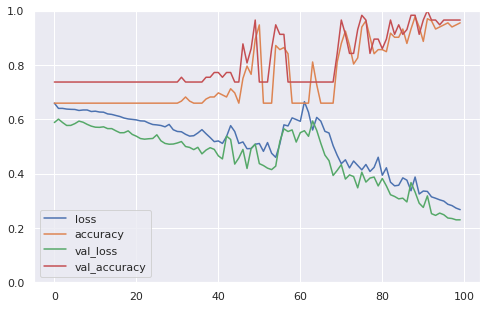

In [854]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [855]:
test_eval = model.evaluate(X_test,y_test)
print(metrics.accuracy_score(y_true= y_test, y_pred= model.predict_classes(X_test)))

2/2 [==============================] - 0s 2ms/step - loss: 0.2298 - accuracy: 0.9649
0.9649122807017544


/home/kacper/.local/lib/python3.8/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
